In [1]:
import pandas as pd 

df = pd.read_csv('troop_movements.csv')
df.head()
# Y value seems to be empire_or_resistance 

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2024-07-08 09:24:43,1,at-at,empire,6,9,10,7,Concord Dawn
1,2024-07-08 09:24:42,2,at-at,resistance,10,10,3,1,Mon Cala
2,2024-07-08 09:24:41,3,tie_fighter,resistance,5,7,1,6,Kashyyyk
3,2024-07-08 09:24:40,4,at-st,resistance,6,5,7,4,Trandosha
4,2024-07-08 09:24:39,5,tie_silencer,resistance,8,4,3,4,Ojom


In [6]:
#df['empire_or_resistance'].groupBy
grouped_df = df.groupby('empire_or_resistance').size() #.count() returns all the rows
grouped_df

empire_or_resistance
empire        490
resistance    510
dtype: int64

In [8]:
homeworld_group = df.groupby('homeworld').size()
homeworld_group

homeworld
Alderaan        24
Aleen Minor     21
Bestine IV      20
Cerea           32
Champala        24
Chandrila       30
Concord Dawn    30
Corellia        24
Dagobah         24
Dathomir        29
Dorin           16
Eriadu          34
Glee Anselm     23
Haruun Kal      16
Iktotch         18
Iridonia        23
Kalee           20
Kashyyyk        26
Malastare       31
Mirial          30
Mon Cala        23
Muunilinst      27
Naboo           22
Ojom            25
Quermia         19
Rodia           25
Ryloth          20
Serenno         21
Shili           26
Skako           20
Socorro         21
Stewjon         19
Sullust         25
Tatooine        19
Tholoth         28
Toydaria        26
Trandosha       25
Troiken         23
Tund            27
Umbara          26
Vulpter         17
Zolan           21
dtype: int64

In [9]:
unit_type_group = df.groupby('unit_type').size()
unit_type_group

unit_type
at-at                 124
at-st                 134
resistance_soldier    126
stormtrooper          124
tie_fighter           129
tie_silencer          114
unknown               128
x-wing                121
dtype: int64

In [12]:
def checkIfResistance(row): 
    if row['empire_or_resistance'] == "empire": 
        return False 
    elif row['empire_or_resistance'] == "resistance": 
        return True 
    
df['is_resistance'] = df.apply(checkIfResistance, axis=1)
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2024-07-08 09:24:43,1,at-at,empire,6,9,10,7,Concord Dawn,False
1,2024-07-08 09:24:42,2,at-at,resistance,10,10,3,1,Mon Cala,True
2,2024-07-08 09:24:41,3,tie_fighter,resistance,5,7,1,6,Kashyyyk,True
3,2024-07-08 09:24:40,4,at-st,resistance,6,5,7,4,Trandosha,True
4,2024-07-08 09:24:39,5,tie_silencer,resistance,8,4,3,4,Ojom,True


### Data Visualization 


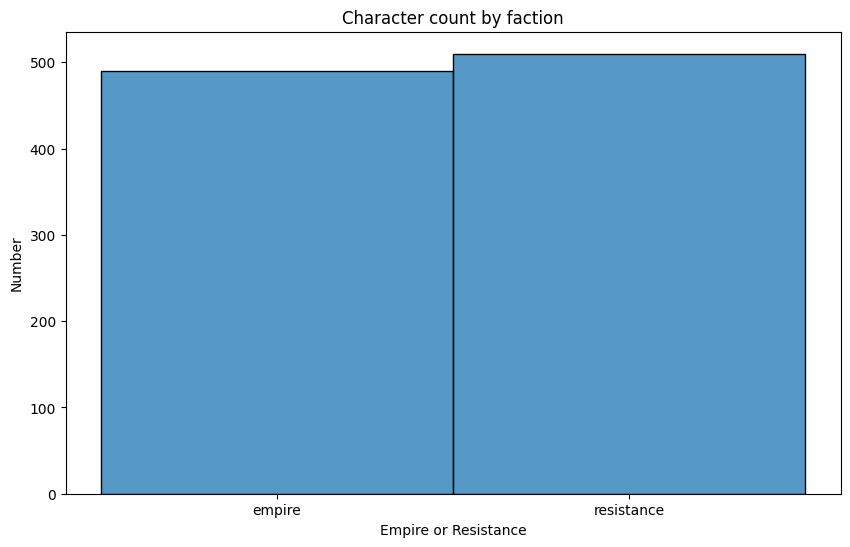

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
data = df 

plt.figure(figsize=(10,6))
sns.histplot(df['empire_or_resistance'])
plt.title("Character count by faction")
plt.xlabel("Empire or Resistance")
plt.ylabel("Count")
plt.show()

### Decision Tree Model 

In [36]:
''' Predict empire/resistance based on homeworld and unit_type '''
# One-hot encoding using pd.get_dummies 
df_encoded = pd.get_dummies(df, columns=['unit_type', 'homeworld'], dtype=int)
X = df_encoded.copy() 
X = X.drop(columns=['timestamp', 'unit_id', 'empire_or_resistance', 'location_x','location_y', 'destination_x', 'destination_y', 'is_resistance']) # Drop the unneccessary original columns
#print(X.head())
y = df['empire_or_resistance']
#print(y.head())

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = DecisionTreeClassifier() 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy) 
# This model isn't good lol 
# But you should be getting a different accuracy score every time you run because of train_test_split

0.525


<Axes: title={'center': 'Feature Importances'}, xlabel='Feature', ylabel='Importance'>

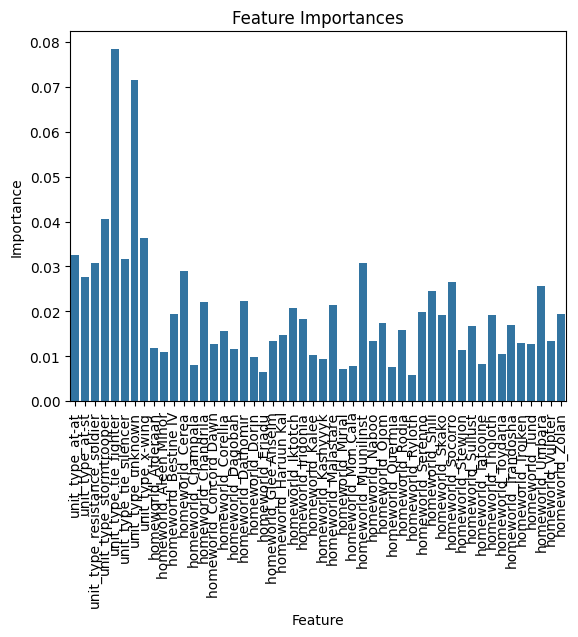

In [54]:
importances = clf.feature_importances_ 
feature_importances = pd.DataFrame({'Feature':X.columns, 'Importance': importances})
#feature_importances

plt.xticks(rotation=90)
plt.title("Feature Importances")
sns.barplot(feature_importances, x="Feature", y="Importance")